## Chapter 5 - Resampling Methods - All graphs

The following notebook is a re-creation from
[JWarmenhoven's notebook](https://nbviewer.jupyter.org/github/JWarmenhoven/ISLR-python/tree/master/Notebooks/)
with the purpose of learning. However, some code blocks are changed to my understanding of the problem.

#### Import block

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-white')

#### Load dataset

In [3]:
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
df1 = pd.read_csv(f'{data_path}Auto.csv', na_values='?').dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### 5.1 Cross-Validation

### Figure 5.2 - Validation Set Approach

Polynomial feature generation scikit-learn [documentation](https://scikit-learn.org/dev/modules/preprocessing.html#generating-polynomial-features)

[[23.61661707 24.80212062 23.44264397 20.75540796 25.31338198 29.58863543
  24.09679807 25.46790858 22.71253984 27.73037117]
 [18.76303135 18.8482926  18.5501988  16.94510676 20.64403597 24.1472723
  18.38519989 20.01093724 16.30163238 20.71822939]
 [18.79694163 18.80511136 18.59522229 16.97437833 20.70112049 24.09892627
  18.66129307 19.95896349 16.92911423 20.69820222]
 [18.77852784 18.71172228 18.59274501 16.89589193 20.64603074 24.20211289
  18.71061822 20.06791371 17.12826812 21.04986122]
 [18.44910467 18.32413852 18.30805345 16.73696511 20.03220873 23.48374801
  18.00415217 19.92178408 17.4016012  21.48083405]
 [18.193668   18.23320817 18.58464505 16.85111261 20.64091187 23.24470565
  17.87225788 20.44172017 18.57576333 23.99482234]
 [18.40493399 18.29298164 18.5248281  17.20926169 20.01783399 23.53731135
  18.09709137 20.1548956  18.01833915 25.47566865]
 [18.59339909 18.41499345 18.43355915 17.36193062 20.13983561 23.76949235
  18.24130344 19.96240505 17.28731184 22.24038394]
 

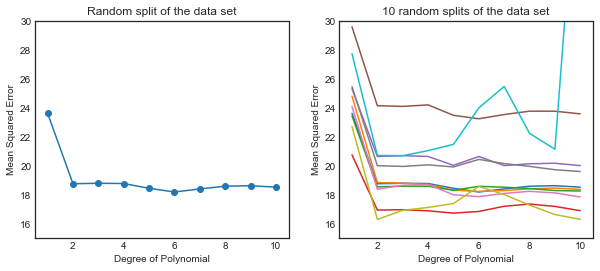

In [19]:
t_prop = 0.5
p_order = np.arange(1, 11)
r_state = np.arange(0, 10)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size, r_state.size))

regr = skl_lm.LinearRegression()

# Generate 10 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly, df1.mpg.ravel(),
                                                        test_size=t_prop, random_state=Y[i,j])
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j] = mean_squared_error(y_test, pred)
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0], Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X, Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2))

### Figure 5.4

In [14]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LOOCV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(df1)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, df1.mpg, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)
    
print(scores)

#### K-Fold

In [15]:
folds = 10
elements = len(df1.index)

X, y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size, r_state.size))

regr = skl_lm.LinearRegression()
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    kf_10 = KFold(n_splits=folds, random_state=Y[i,j])
    Z[i,j] = cross_val_score(regr, X_poly, df1.mpg, cv=kf_10, scoring='neg_mean_squared_error').mean()

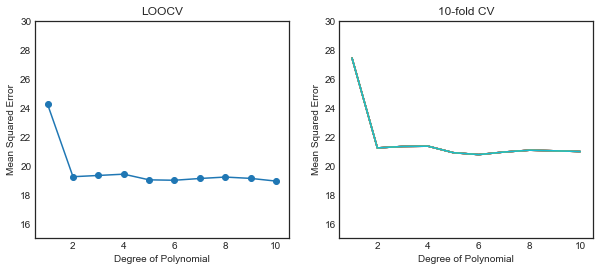

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# left plot
ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

# right plot
ax2.plot(X, Z*-1)
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2))
    